In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tkinter import E


# import Data miners 2022 (answers).csv from the same directory as this file and create a dataframe called df
df = pd.read_csv('Data miners 2022 (answers).csv')

df = df.reset_index(drop=True) # Remove the index from the file

#change Your height (in International inches)\nAlready, an awkward data storage format. It's good to be fluent in multiple systems! to height
df = df.rename(columns={'Your height (in International inches)\nAlready, an awkward data storage format. It\'s good to be fluent in multiple systems!':'height'})
#change Your mean shoe size (In European Continental system)	to shoe_size
df = df.rename(columns={'Your mean shoe size (In European Continental system)':'shoe_size'})

# Assign all points to class 0
df['class'] = 1

#remove all columns but shoe_size, height, and class
df = df[['shoe_size', 'height', 'class']]

#remove observations that are 3 standard deviations from the mean
df = df[(np.abs(df.height-df.height.mean()) <= (3*df.height.std())) & (np.abs(df.shoe_size-df.shoe_size.mean()) <= (3*df.shoe_size.std()))]

#normalize the data
df['height'] = df['height'] / max(df['height']) 
df['shoe_size'] = df['shoe_size'] / max(df['shoe_size']) 

display(df)


,shoe_size,height,class
0,1.000000,0.035028,1
1,0.829787,0.943503,1
2,0.893617,0.384181,1
3,0.808511,0.375706,1
4,0.851064,0.371412,1
5,0.893617,0.429379,1
6,0.936170,0.400565,1
8,0.893617,0.400000,1
9,0.851064,0.389831,1
10,0.872340,0.033898,1


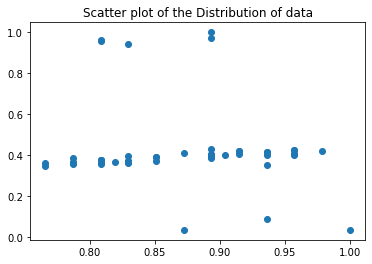

In [131]:
plt.title('Scatter plot of the Distribution of data')
plt.scatter(df['shoe_size'],df['height']) # Visualizing the distribution
plt.show()

In [132]:
def initializeMeans(df):
    """
    Intialize the means by randomly taking two points from the dataframe. Hint: check the function 'random.randint'
    return two pandas dataframes (or pandas series) with mean1 and mean2
    """ 

    #randomly select two points from the dataframe
    mean1 = df.iloc[random.randint(0, len(df)-1)]
    mean2 = df.iloc[random.randint(0, len(df)-1)]
    mean3 = df.iloc[random.randint(0, len(df)-1)]

    return mean1, mean2, mean3

initializeMeans(df)


(shoe_size    0.765957
 height       0.347458
 class        1.000000
 Name: 44, dtype: float64,
 shoe_size    0.957447
 height       0.400395
 class        1.000000
 Name: 22, dtype: float64,
 shoe_size    0.978723
 height       0.418079
 class        1.000000
 Name: 25, dtype: float64)

In [133]:
import math

#create a helper function that calulates the euclidean distance between two points
def euclideanDistHelper(point1, point2):
    y2 = point2[1]
    return math.sqrt((point2[0]-point1[0])**2 + (point2[1]-point1[1])**2)

print(euclideanDistHelper([1,2],[3,4]) == 2.8284271247461903)

def euclideanDist(df,pointIDX,mean1,mean2,mean3):

    #calculate the distance between the point and the mean
    
    #euclidean distance formula
    dist1 = euclideanDistHelper(df.iloc[pointIDX], mean1)
    dist2 = euclideanDistHelper(df.iloc[pointIDX], mean2)
    dist3 = euclideanDistHelper(df.iloc[pointIDX], mean3)



    
    #assign the point to the closest mean
    # Assign the point to the mean with the smallest distance

    print("dist1 " + str(dist1))
    print("dist2 " + str(dist2))
    print("dist3 " + str(dist3))
    
    lowest = min(dist1, dist2, dist3)

    print("lowest " + str(lowest))

    # Assign the point to the mean with the smallest distance
    if lowest == dist1:
        df.loc[pointIDX,"class"] = 0
    elif lowest == dist2:
        df.loc[pointIDX,"class"] = 1
    else:
        df.loc[pointIDX,"class"] = 2
    

m1, m2, m3 = initializeMeans(df)
b = euclideanDist(df, 5, m1,m2,m3)

True
dist1 0.0677122637797142
dist2 0.07206507302567282
dist3 0.0677122637797142
lowest 0.0677122637797142


In [134]:
def updateMean(df):
    #function calculates the mean of the points in each class

    mean1 = df.loc[df['class']==0].mean()
    mean2 = df.loc[df['class']==1].mean()
    mean3 = df.loc[df['class']==2].mean()
    
    return mean1, mean2, mean3

In [135]:
def Kmeans(df,iterations):

    # Initialize the means
    mean1, mean2, mean3 = initializeMeans(df)

    # Run the Kmeans algorithm
    for iteration in range(iterations):

        print("Iteration {}/{}".format(iteration,iteration))
        
        for i in range(len(df)):
            df = euclideanDist(df,i,mean1,mean2, mean3)
            
        mean1, mean2, mean3 = updateMean(df)

    return df, mean1, mean2, mean3

df, mean1, mean2, mean3 = Kmeans(df,5)




Iteration 0/0
dist1 0.38975204111277406
dist2 0.9708181184887495
dist3 0.3698667252778
lowest 0.3698667252778


AttributeError: 'NoneType' object has no attribute 'iloc'

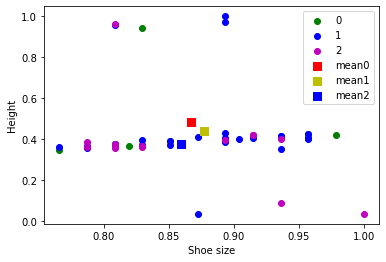

In [ ]:
plt.clf()

plt.xlabel('Shoe size')
plt.ylabel('Height')

plt.scatter(df.loc[df['class'] == 0]['shoe_size'],df.loc[df['class'] == 0]['height'],color='g',label='0')  #
plt.scatter(df.loc[df['class'] == 1]['shoe_size'],df.loc[df['class'] == 1]['height'],color='b',label='1')  #
plt.scatter(df.loc[df['class'] == 2]['shoe_size'],df.loc[df['class'] == 2]['height'],color='m',label='2')  #
                                                                                                            #
plt.scatter(mean1['shoe_size'],mean1['height'],s=70,label='mean0',marker='s',color='r')                    # Visualizing the final class distribution
plt.scatter(mean2['shoe_size'],mean2['height'],s=70,label='mean1',marker='s',color='y')     
plt.scatter(mean3['shoe_size'],mean3['height'],s=70,label='mean2',marker='s',color='b')                   #
                                                                                                            #
plt.legend()                                                                                                #
plt.show()    




